In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import boxcox

In [3]:
data = pd.read_csv('Documents/Datasets/Crimes_2015.csv')

In [9]:
data.iloc:7]

Dates                   2015-09-05
Primary Type               ROBBERY
Location Description        STREET
Arrest                           0
Domestic                         1
Ward                          27.0
Counts                         498
District                        12
Primary Types                   26
Name: 7, dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16649 entries, 0 to 16648
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dates                 16649 non-null  object 
 1   Primary Type          16649 non-null  object 
 2   Location Description  16649 non-null  object 
 3   Arrest                16649 non-null  int64  
 4   Domestic              16649 non-null  int64  
 5   Ward                  16649 non-null  float64
 6   Counts                16649 non-null  int64  
 7   District              16649 non-null  int64  
 8   Primary Types         16649 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.1+ MB


In [5]:
data['Dates'] = pd.to_datetime(data.Dates)

In [6]:
data = data.rename(columns={'Primary Type':'primary_type','Location Description':'Location','Primary Types':'primary_types'})

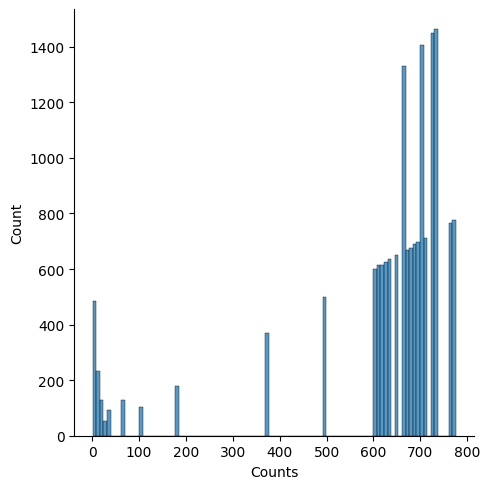

In [7]:
#проверяем зависимую переменную Counts на нормальность
sns.displot(data.Counts)

In [8]:
data.describe()

,Dates,Arrest,Domestic,Ward,Counts,District,primary_types
count,16649,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000
mean,2015-09-10 11:51:44.402666496,0.247883,0.161751,22.761487,621.183014,11.227821,13.892366
min,2015-01-01 00:00:00,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2015-09-09 00:00:00,0.000000,0.000000,10.000000,626.000000,6.000000,2.000000
50%,2015-09-15 00:00:00,0.000000,0.000000,22.000000,677.000000,10.000000,9.000000
75%,2015-09-21 00:00:00,0.000000,0.000000,34.000000,724.000000,17.000000,26.000000
max,2015-12-30 00:00:00,1.000000,1.000000,50.000000,776.000000,31.000000,30.000000
std,NaN,0.431796,0.368234,13.945305,189.768234,6.887076,11.063366


In [9]:
df = data.copy()

In [10]:
#импортируем модель
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [11]:
x = df[['Arrest','District','primary_types','Domestic','Ward']]
y = df['Counts']
x = sm.add_constant(x,prepend=False)

In [12]:
model = OLS(y,x)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Counts   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     46.66
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           4.65e-48
Time:                        21:59:11   Log-Likelihood:            -1.1084e+05
No. Observations:               16649   AIC:                         2.217e+05
Df Residuals:                   16643   BIC:                         2.217e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Arrest           46.1892      3.390     13.627

In [13]:
#предикторы District и Ward показали статистическую незначимость

In [14]:
x = df[['Arrest','primary_types','Domestic']]
y = df['Counts']
x = sm.add_constant(x, prepend=False)

In [15]:
model = OLS(y,x)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Counts   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     77.09
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.63e-49
Time:                        21:59:12   Log-Likelihood:            -1.1085e+05
No. Observations:               16649   AIC:                         2.217e+05
Df Residuals:                   16645   BIC:                         2.217e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Arrest           46.2569      3.389     13.648

In [16]:
# Проверяем на мультиколлинеарность
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df[['Arrest','primary_types','Domestic']]

In [17]:
vif_data = pd.DataFrame()

vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

         feature       VIF
0         Arrest  1.219746
1  primary_types  1.216226
2       Domestic  1.034569


In [18]:
# Значительной мультиколлинеарности не обнаружено

In [19]:
# Протестируем при стандартизации
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
# подготовим данные
scaler = StandardScaler()
x = df[['Arrest','primary_types','Domestic']]
y = df['Counts']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=228)

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)

In [25]:
print(np.sqrt(mse), df['Counts'].mean())

192.82850867050183 621.1830139948345


In [26]:
# средняя ошибка модели равна 192 преступлениям при среднем в 621

In [27]:
# пробуем стандартизировать данные

In [28]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [29]:
model_scale = LinearRegression()
model_scale.fit(x_train_scale, y_train)

LinearRegression()

In [30]:
y_pred_scale = model_scale.predict(x_test_scale)
mse = mean_squared_error(y_test, y_pred_scale)
print(np.sqrt(mse))

192.82850867050183


In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
# тестируем с взаимодействием признаков

In [33]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

In [34]:
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)

In [35]:
model.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))

192.37594865504505


In [37]:
# уменьшили ошибку, но не сильно :)))

<Axes: xlabel='Ward', ylabel='Counts'>

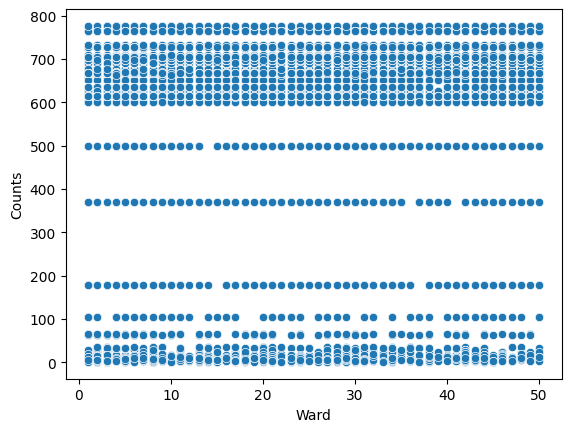

In [42]:
sns.scatterplot(df, y='Counts', x='Ward')